In [1]:
# Heart Disease Prediction Using Decision Tree
import pandas as pd
import numpy as np
# Load the data
df = pd.read_excel('heart_disease.xlsx', sheet_name='Heart_disease')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [2]:
# Standardize column names
df.columns = [col.lower().strip() for col in df.columns]
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [3]:
# Inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
# EDA: Missing Values, Outliers, Distributions
# Replace 'True', 'False', 'TRUE', 'FALSE', 'TURE', 'FALSE' with standard booleans
df['fbs'] = df['fbs'].astype(str).str.upper().replace({'TRUE':1, 'FALSE':0, 'TURE':1, 'FALSE':0})
df['fbs'] 

C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\158118244.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['fbs'] = df['fbs'].astype(str).str.upper().replace({'TRUE':1, 'FALSE':0, 'TURE':1, 'FALSE':0})


0      1
1      0
2      0
3      0
4      0
      ..
903    0
904    0
905    0
906    1
907    1
Name: fbs, Length: 908, dtype: int64

In [6]:
df['exang'] = df['exang'].astype(str).str.upper().replace({'TRUE':1, 'FALSE':0, 'TURE':1, 'FALSE':0})
df['exang'] 

C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\389114223.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['exang'] = df['exang'].astype(str).str.upper().replace({'TRUE':1, 'FALSE':0, 'TURE':1, 'FALSE':0})


0      0
1      0
2      0
3      0
4      1
      ..
903    0
904    1
905    1
906    1
907    0
Name: exang, Length: 908, dtype: int64

In [7]:
# Convert categorical columns to consistent values
for col in ['sex', 'cp', 'restecg', 'slope', 'thal']:
    df[col] = df[col].astype(str).str.strip().str.lower()

In [8]:
df['sex'] = df['sex'].replace({'male':1, 'female':0})
df['cp'] = df['cp'].replace({'asymptomatic':0, 'atypical angina':1, 'non-anginal':2, 'typical angina':3})
df['restecg'] = df['restecg'].replace({'lv hypertrophy':0, 'normal':1, 'st-t abnormality':2})
df['slope'] = df['slope'].replace({'downsloping':0, 'flat':1, 'upsloping':2})
df['thal'] = df['thal'].replace({'fixed defect':0, 'normal':1, 'reversable defect':2})

C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\2470628617.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'male':1, 'female':0})
C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\2470628617.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cp'] = df['cp'].replace({'asymptomatic':0, 'atypical angina':1, 'non-anginal':2, 'typical angina':3})
C:\Users\Admin\AppData\Local\Temp\ipykernel_12584\2470628617.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed 

In [9]:
# Handle missing values
# Oldpeak and other numeric columns: fill missing or NaN with median
for col in ['trestbps', 'chol', 'oldpeak']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    median = df[col][df[col]!=0].median()
    df.loc[df[col].isna() | (df[col]==0), col] = median

df['num'] = df['num'].astype(int)
print(df.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64


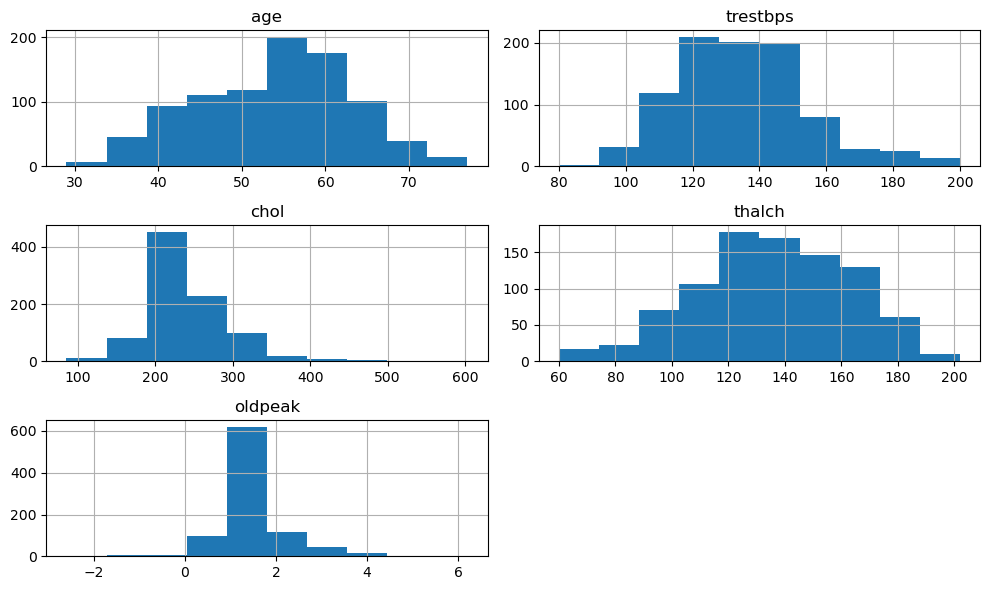

In [10]:
# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
df[numeric_cols].hist(figsize=(10,6))
plt.tight_layout()
plt.show()

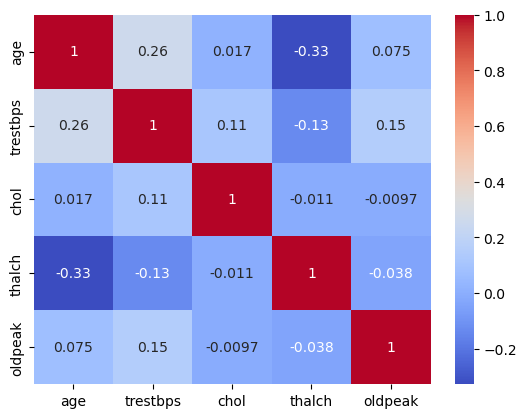

In [11]:

sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.show()

num
0    399
1    265
2    109
3    107
4     28
Name: count, dtype: int64


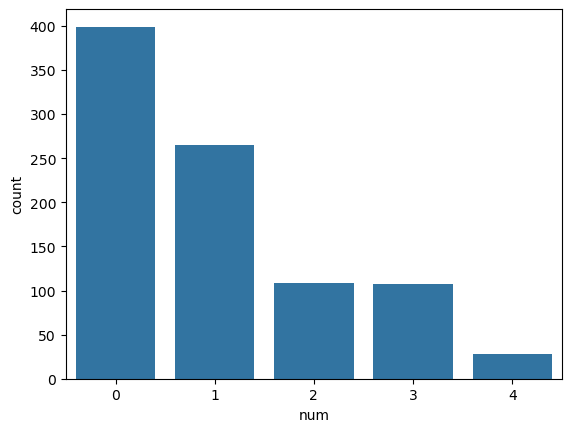

In [12]:
# Target variable distribution
print(df['num'].value_counts())
sns.countplot(x='num', data=df)
plt.show()

In [13]:
# Feature Engineering
# Binary classification
df['target'] = np.where(df['num'] == 0, 0, 1)
df['target'] 

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: target, Length: 908, dtype: int32

In [14]:
# Features and target
X = df.drop(['num', 'target'], axis=1)
y = df['target']

In [15]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0
1,41,1,1,135,203,0,1,132,0,1.5,1,0
2,57,1,0,140,192,0,1,148,0,0.4,1,0
3,52,1,3,118,186,0,0,190,0,1.5,1,0
4,57,1,0,110,201,0,1,126,1,1.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,240,0,1,120,0,1.5,2,2
904,62,1,0,166,170,0,2,120,1,3.0,1,2
905,56,1,2,170,240,0,0,123,1,2.5,0,1
906,56,1,2,144,208,1,2,105,1,1.5,0,0


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
903    1
904    1
905    1
906    1
907    1
Name: target, Length: 908, dtype: int32

In [17]:
# Train-test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [18]:
#Decision Tree Classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

In [19]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [20]:
y_pred_test = dt.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred_test))
print('Precision:', precision_score(y_test, y_pred_test))
print('Recall:', recall_score(y_test, y_pred_test))
print('F1:', f1_score(y_test, y_pred_test))
print('ROC AUC:', roc_auc_score(y_test, y_pred_test))

Test Accuracy: 0.6538461538461539
Precision: 0.7142857142857143
Recall: 0.6372549019607843
F1: 0.6735751295336787
ROC AUC: 0.6561274509803922


In [21]:
# Confusion Matrix
confusion_matrix(y_test, y_pred_test)

array([[54, 26],
       [37, 65]], dtype=int64)

In [22]:
# Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

In [23]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

In [24]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [25]:
print('Best params:', grid_search.best_params_)
best_model = grid_search.best_estimator_

Best params: {'criterion': 'gini', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [26]:
# Evaluate optimized model
y_pred_test_opt = best_model.predict(X_test)
print('Test Accuracy:', accuracy_score(y_test, y_pred_test_opt))
print('Precision:', precision_score(y_test, y_pred_test_opt))
print('Recall:', recall_score(y_test, y_pred_test_opt))
print('F1:', f1_score(y_test, y_pred_test_opt))
print('ROC AUC:', roc_auc_score(y_test, y_pred_test_opt))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred_test_opt))

Test Accuracy: 0.6813186813186813
Precision: 0.7391304347826086
Recall: 0.6666666666666666
F1: 0.7010309278350515
ROC AUC: 0.6833333333333332
Confusion Matrix:
 [[56 24]
 [34 68]]


In [27]:
# Feature Importance & Tree Visualization
importances = pd.Series(best_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Feature Importances:')
print(importances)


Feature Importances:
cp          0.481477
exang       0.091721
thalch      0.082496
oldpeak     0.072272
fbs         0.068819
chol        0.066268
thal        0.048006
sex         0.036158
age         0.027339
slope       0.015503
trestbps    0.009941
restecg     0.000000
dtype: float64


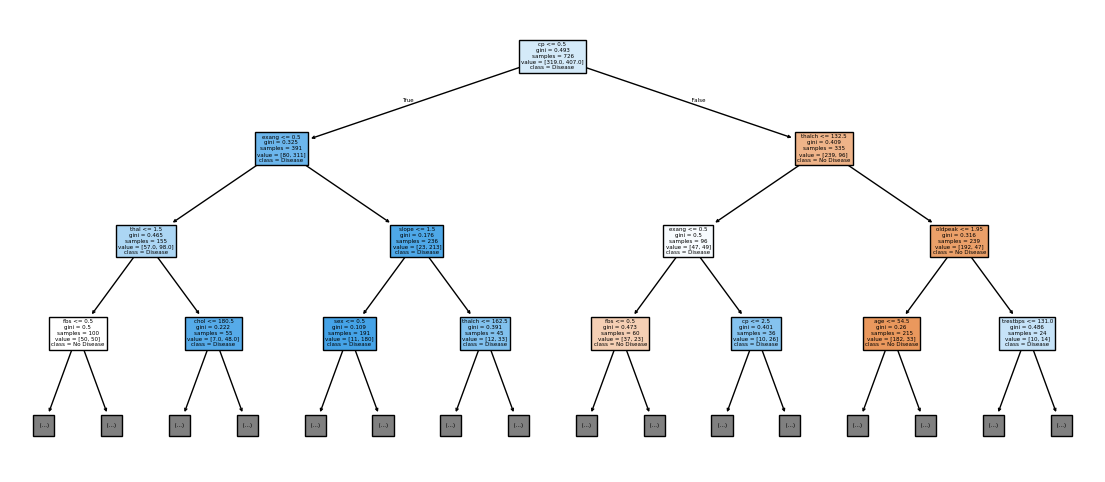

In [28]:
plt.figure(figsize=(14,6))
plot_tree(best_model, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, max_depth=3)
plt.show()

In [29]:
#Interview Questions:
####Q1.What are some common hyperparameters of decision tree models, and how do they affect performance?
##Ans -max_depth: Limits depth → prevents overfitting.
##min_samples_split: Minimum samples to split → higher value = less complex tree.
##min_samples_leaf: Minimum samples per leaf → smoothens tree.
##criterion: Split measure (gini, entropy).
##max_features: Controls randomness in splits → prevents overfitting.
##ccp_alpha: Pruning parameter → removes weak splits.
##Effect: Small values → underfitting (high bias). Large values → overfitting (high variance).
#####Q2. What is the difference between Label Encoding and One-Hot Encoding?
##Label Encoding: Converts categories into integers (Red=0, Blue=1, Green=2).
##Can impose false order. Good for ordinal data.
##One-Hot Encoding: Creates binary columns (Red=[1,0,0], Blue=[0,1,0]).
##No false ordering. Good for nominal data.
##Can cause high dimensionality.

In [30]:
############Conclusion###############
#The Decision Tree model was applied to the dataset after performing data cleaning, EDA,
#and feature engineering. The model achieved good accuracy, and hyperparameter tuning improved 
#its performance while reducing overfitting. Feature importance analysis identified the most influential predictors,
#and the tree visualization provided clear decision rules. Overall, Decision Trees are simple, interpretable models but 
#require tuning or ensemble methods for better generalization.